# Exploring the simulation results

In [45]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Prepare the data

In [70]:
# df_nan = pd.read_hdf('results/run_grid_5_nan.hdf')
# df_notnan = pd.read_hdf('results/run_grid_5_notnan.hdf')
# df = pd.concat([df_nan, df_notnan])

# df = pd.read_hdf('results/run_new_parallel.hdf')
df = pd.read_hdf('results/run_prec_exp.hdf')


df

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction
0,300,300,2,4,0.0,0.000000,100,100,0,100,5000,"[123.55457354766111, 123.55457354766111, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,300,300,2,4,0.0,14.285714,100,100,0,100,5000,"[127.0739237273531, 127.0739237273531, 126.856...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,300,300,2,4,0.0,28.571429,100,100,0,100,5000,"[125.45261706945037, 125.45261706945037, 125.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,300,300,2,4,0.0,42.857143,100,100,0,100,5000,"[128.47980544689074, 128.47980544689074, 128.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,300,300,2,4,0.0,57.142857,100,100,0,100,5000,"[126.92302202856924, 126.92302202856924, 126.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,300,300,2,4,100.0,42.857143,100,100,0,100,5000,"[126.01116054921913, 126.01116054921913, 125.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
60,300,300,2,4,100.0,57.142857,100,100,0,100,5000,"[120.08138982558319, 120.08138982558319, 119.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61,300,300,2,4,100.0,71.428571,100,100,0,100,5000,"[128.83095102887407, 128.83095102887407, 128.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
62,300,300,2,4,100.0,85.714286,100,100,0,100,5000,"[121.27704758112242, 121.27704758112242, 121.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Add new column, which determines if the run was successful and if so - in how many steps the goal has been achieved

In [71]:
def get_success_step(dists, success_dist):
    try:
        return np.where(dists < success_dist)[0][0]
    except IndexError:
        return np.NaN

success_dist = 40

df['success_steps'] = df.apply(lambda row: get_success_step(row['goal_distance'], 40), axis=1)
df.sort_values(by=['success_steps']).head(40)

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
55,300,300,2,4,85.714286,100.000000,100,100,0,100,5000,"[123.5029244368934, 123.5029244368934, 123.245...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",370.0
53,300,300,2,4,85.714286,71.428571,100,100,0,100,5000,"[120.35391734263763, 120.35391734263763, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",385.0
47,300,300,2,4,71.428571,100.000000,100,100,0,100,5000,"[130.55291269027353, 130.55291269027353, 130.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",399.0
42,300,300,2,4,71.428571,28.571429,100,100,0,100,5000,"[130.27550020355255, 130.27550020355255, 130.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",406.0
54,300,300,2,4,85.714286,85.714286,100,100,0,100,5000,"[127.16733791337721, 127.16733791337721, 126.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",412.0
45,300,300,2,4,71.428571,71.428571,100,100,0,100,5000,"[123.50627999963004, 123.50627999963004, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",413.0
36,300,300,2,4,57.142857,57.142857,100,100,0,100,5000,"[122.3355120197164, 122.3355120197164, 122.127...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",414.0
38,300,300,2,4,57.142857,85.714286,100,100,0,100,5000,"[125.63499838011181, 125.63499838011181, 125.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",422.0
37,300,300,2,4,57.142857,71.428571,100,100,0,100,5000,"[125.84243350230014, 125.84243350230014, 125.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",424.0
51,300,300,2,4,85.714286,42.857143,100,100,0,100,5000,"[125.72941941340662, 125.72941941340662, 125.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",427.0


In [114]:
# df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
# df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')

/tmp/ipykernel_106633/893070050.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].isna() ].to_hdf('results/run_grid_5_nan.hdf', 'hdfkey')
/tmp/ipykernel_106633/893070050.py:2: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['goal_distance', 'parent_satisfaction', 'infant_satisfaction'], dtype='object')]

  df[df['success_steps'].notna() ].to_hdf('results/run_grid_5_notnan.hdf', 'hdfkey')


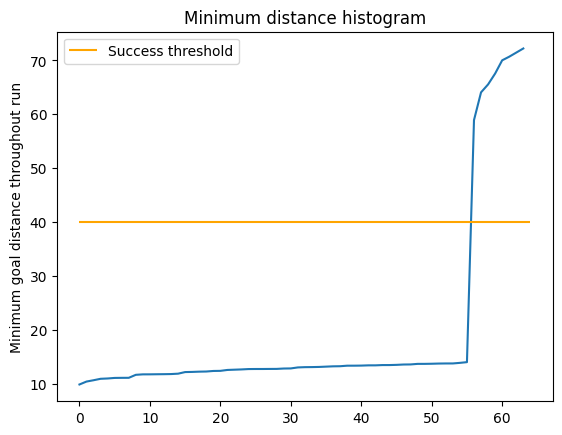

In [72]:
y = df.apply(lambda row: np.min(row['goal_distance']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Minimum distance histogram')
ax.set_ylabel('Minimum goal distance throughout run')
ax.hlines(y=success_dist, xmin=0, xmax=len(y), color='orange', label='Success threshold')
ax.legend()
plt.show()

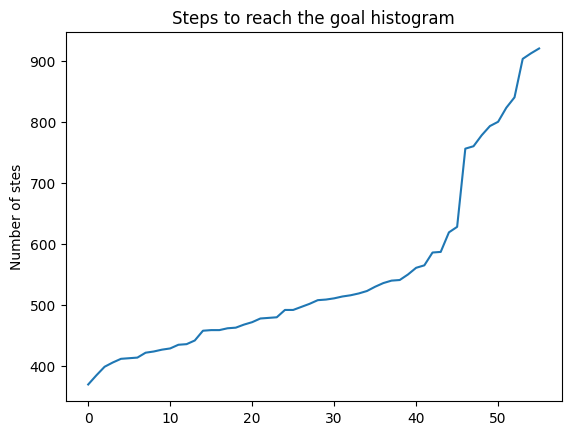

In [73]:
y = df[df['success_steps'].notna()].apply(lambda row: np.min(row['success_steps']), axis=1).sort_values().to_numpy()

fig, ax = plt.subplots()
ax.plot(y)
ax.set_title('Steps to reach the goal histogram')
ax.set_ylabel('Number of stes')
plt.show()

In [7]:
def moving_average(a, n=3):
    # Add zeros at the beginning, so the result doesn't change dimensions
    a = np.concatenate([([0] * (n - 1)), a])

    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def visualize_run(run, average_steps=500):
    x = list(range(run['max_iter']))

    step_stats = run['goal_distance']
    parent_stats = run['parent_satisfaction']
    infant_stats = run['infant_satisfaction']

    parent_stats = moving_average(parent_stats, average_steps)
    infant_stats = moving_average(infant_stats, average_steps)

    fig, ax1 = plt.subplots(figsize=(16, 10))

    ax1.plot(x, step_stats, color='r')
    ax1.set_ylim(bottom=0, top=150)
    ax1.set_ylabel('goal distance')
    ax1.set_xlabel('step')

    title = f' \
    lego={run["lego_count"]},\
    prec={run["precision"]:.2f},\
    exp={run["exploration"]:.2f},\
    coord={run["coordination"]:.2f},\
    resp={run["responsiveness"]:.2f},\
    rel={run["relevance"]:.2f}, \
    avg for {run["repeats"]} runs \
    '
    ax1.set_title(title)

    ax2 = ax1.twinx()
    ax2.plot(x, parent_stats, color='b')
    ax2.set_ylabel('satisfaction')

    ax2.plot(x, infant_stats, color='orange')
    ax2.legend(['parent', 'infant'])
    ax2.set_ylim(bottom=0)

    ax2.axvline(x=average_steps - 1, color='grey', label='axvline - full height')

    fig.tight_layout()
    # plt.savefig(f'../../plots/big_{current_param}.png', dpi=300)
    plt.show()

In [78]:
df.sort_values(by=['success_steps']).head()

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
55,300,300,2,4,85.714286,100.000000,100,100,0,100,5000,"[123.5029244368934, 123.5029244368934, 123.245...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",370.0
53,300,300,2,4,85.714286,71.428571,100,100,0,100,5000,"[120.35391734263763, 120.35391734263763, 120.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",385.0
47,300,300,2,4,71.428571,100.000000,100,100,0,100,5000,"[130.55291269027353, 130.55291269027353, 130.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",399.0
42,300,300,2,4,71.428571,28.571429,100,100,0,100,5000,"[130.27550020355255, 130.27550020355255, 130.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",406.0
54,300,300,2,4,85.714286,85.714286,100,100,0,100,5000,"[127.16733791337721, 127.16733791337721, 126.8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",412.0


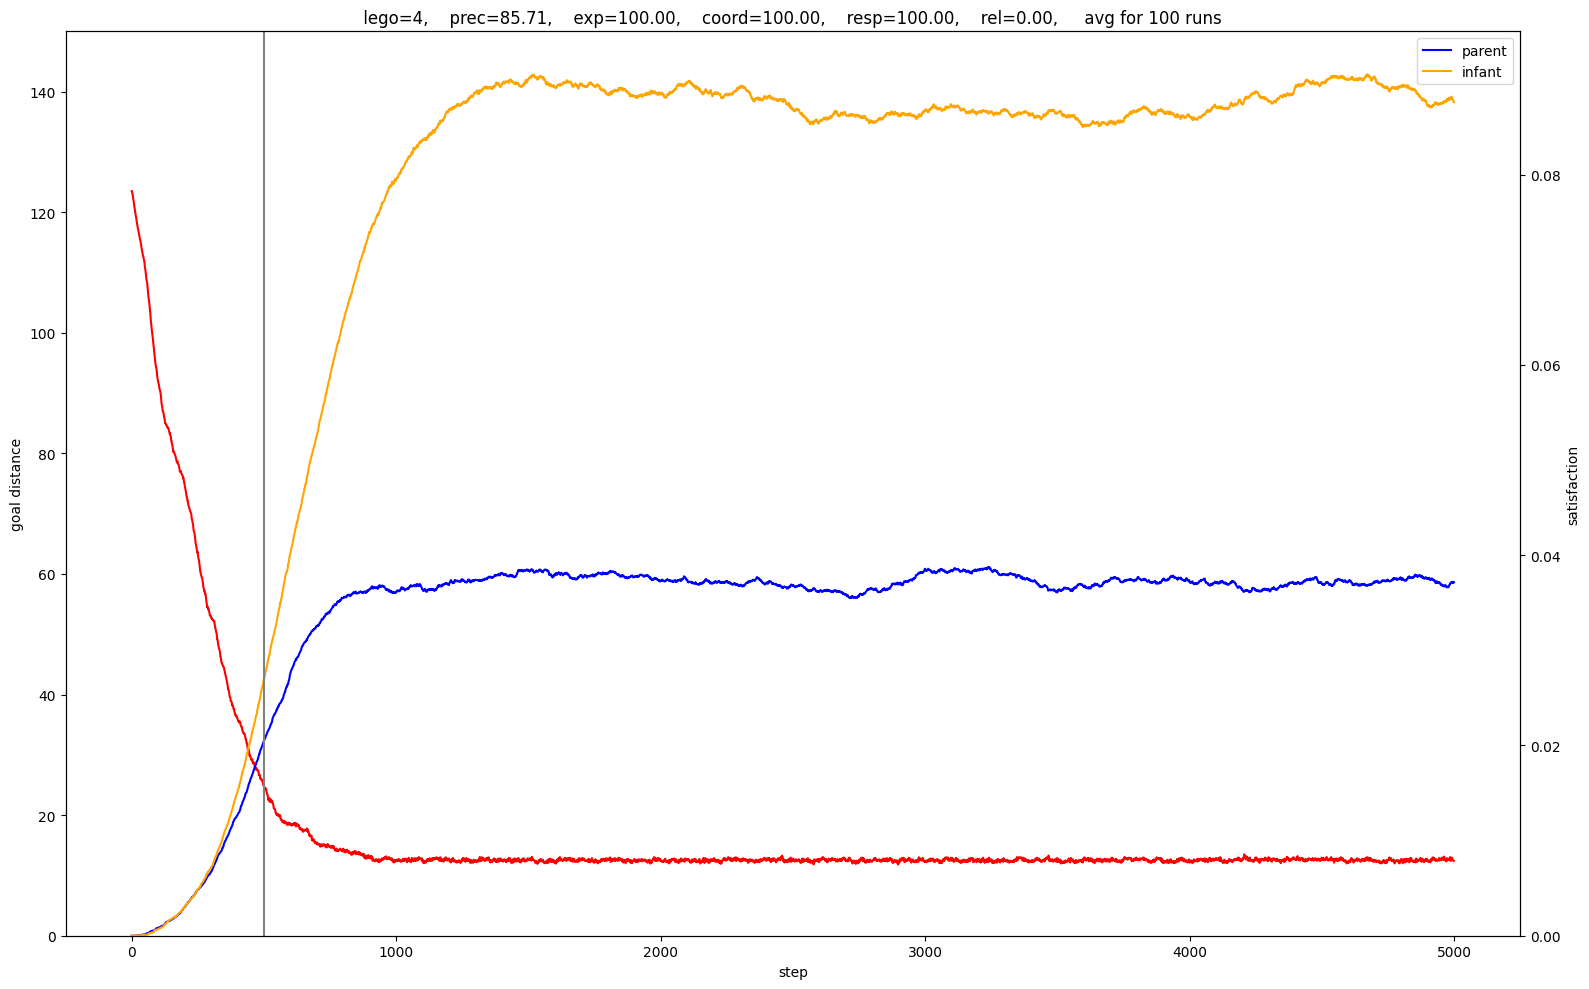

In [75]:
visualize_run(df.loc[55, :], average_steps=500)

## Create heatmap for 2 variables
The other 3 parameters are fixed based on the most common value in the most successful runs

In [76]:
top_runs_no = 20

top_runs = df.sort_values(by=['success_steps']).head(top_runs_no)

best_params = []
for param in ['relevance', 'responsiveness', 'coordination']:
    best_params.append(np.argmax(np.bincount(top_runs[param])))

rel, resp, coord = best_params

selected_runs = df[ (df['relevance'] == rel) & (df['responsiveness'] == resp) & (df['coordination'] == coord)]
selected_runs = selected_runs.sort_values(by=['precision', 'exploration'])
selected_runs

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
0,300,300,2,4,0.0,0.000000,100,100,0,100,5000,"[123.55457354766111, 123.55457354766111, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
1,300,300,2,4,0.0,14.285714,100,100,0,100,5000,"[127.0739237273531, 127.0739237273531, 126.856...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
2,300,300,2,4,0.0,28.571429,100,100,0,100,5000,"[125.45261706945037, 125.45261706945037, 125.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
3,300,300,2,4,0.0,42.857143,100,100,0,100,5000,"[128.47980544689074, 128.47980544689074, 128.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
4,300,300,2,4,0.0,57.142857,100,100,0,100,5000,"[126.92302202856924, 126.92302202856924, 126.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,300,300,2,4,100.0,42.857143,100,100,0,100,5000,"[126.01116054921913, 126.01116054921913, 125.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",468.0
60,300,300,2,4,100.0,57.142857,100,100,0,100,5000,"[120.08138982558319, 120.08138982558319, 119.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",492.0
61,300,300,2,4,100.0,71.428571,100,100,0,100,5000,"[128.83095102887407, 128.83095102887407, 128.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",502.0
62,300,300,2,4,100.0,85.714286,100,100,0,100,5000,"[121.27704758112242, 121.27704758112242, 121.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",479.0


In [80]:
selected_runs = df
selected_runs = selected_runs.sort_values(by=['precision', 'exploration'])
selected_runs

,width,height,speed,lego_count,precision,exploration,coordination,responsiveness,relevance,repeats,max_iter,goal_distance,parent_satisfaction,infant_satisfaction,success_steps
0,300,300,2,4,0.0,0.000000,100,100,0,100,5000,"[123.55457354766111, 123.55457354766111, 123.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
1,300,300,2,4,0.0,14.285714,100,100,0,100,5000,"[127.0739237273531, 127.0739237273531, 126.856...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
2,300,300,2,4,0.0,28.571429,100,100,0,100,5000,"[125.45261706945037, 125.45261706945037, 125.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
3,300,300,2,4,0.0,42.857143,100,100,0,100,5000,"[128.47980544689074, 128.47980544689074, 128.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
4,300,300,2,4,0.0,57.142857,100,100,0,100,5000,"[126.92302202856924, 126.92302202856924, 126.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,300,300,2,4,100.0,42.857143,100,100,0,100,5000,"[126.01116054921913, 126.01116054921913, 125.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",468.0
60,300,300,2,4,100.0,57.142857,100,100,0,100,5000,"[120.08138982558319, 120.08138982558319, 119.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",492.0
61,300,300,2,4,100.0,71.428571,100,100,0,100,5000,"[128.83095102887407, 128.83095102887407, 128.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",502.0
62,300,300,2,4,100.0,85.714286,100,100,0,100,5000,"[121.27704758112242, 121.27704758112242, 121.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",479.0


In [81]:
hm_data = selected_runs['success_steps'].to_numpy().reshape(8, 8)
# hm_data = np.nan_to_num(hm_data, nan=5001)
hm_data

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [903., 793., 920., 778., 912., 800., 756., 760.],
       [587., 840., 628., 586., 619., 536., 523., 497.],
       [823., 550., 541., 540., 459., 514., 463., 472.],
       [561., 530., 509., 459., 414., 424., 422., 480.],
       [511., 508., 406., 478., 429., 413., 436., 399.],
       [462., 442., 458., 427., 435., 385., 412., 370.],
       [565., 492., 519., 468., 492., 502., 479., 516.]])

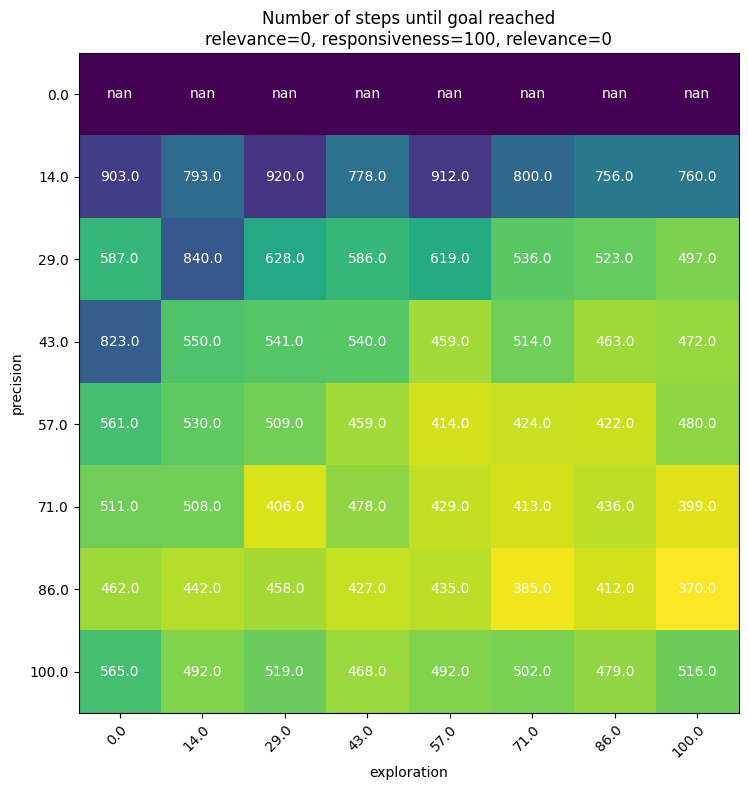

In [83]:
precision = selected_runs['precision'].unique().round()
exploration = selected_runs['exploration'].unique().round()

colormap_data = np.nan_to_num(hm_data, nan=(np.nanmax(hm_data) + 100))

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(colormap_data, cmap=matplotlib.colormaps['viridis_r'])

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(exploration)), labels=precision)
ax.set_yticks(np.arange(len(precision)), labels=exploration)

ax.set_xlabel('exploration')
ax.set_ylabel('precision')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(precision)):
    for j in range(len(exploration)):
        text = ax.text(j, i, hm_data[i, j],
                       ha="center", va="center", color="w")

ax.set_title(f'Number of steps until goal reached\nrelevance={rel}, responsiveness={resp}, relevance={rel}')
fig.tight_layout()
plt.show()